## Installing important libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import classification_report, confusion_matrix

## Retreiving the data

In [ ]:
!gdown --id 1aTdpNQJ7sBZWiObHBfXFjYLzh2YEstlV
temperature_data = pd.read_csv('temperature.csv')

Downloading...
From: https://drive.google.com/uc?id=1aTdpNQJ7sBZWiObHBfXFjYLzh2YEstlV
To: /content/temperature.csv
14.0MB [00:00, 85.4MB/s]


In [ ]:
!gdown --id 1KKUvhbsuBFShe1p7LUeeqqHPL0JfyaMg
humidity_data = pd.read_csv('humidity.csv')

Downloading...
From: https://drive.google.com/uc?id=1KKUvhbsuBFShe1p7LUeeqqHPL0JfyaMg
To: /content/humidity.csv
9.08MB [00:00, 34.3MB/s]


In [ ]:
!gdown --id 1nGlFzBIKGH1hKLZhQkosyUEmZwqOgl0_
wind_speed_data = pd.read_csv('wind_speed.csv')

Downloading...
From: https://drive.google.com/uc?id=1nGlFzBIKGH1hKLZhQkosyUEmZwqOgl0_
To: /content/wind_speed.csv
7.46MB [00:00, 65.7MB/s]


In [ ]:
!gdown --id 13k2GdHunVPllJ936GECxBPplTcE-vWYT
pressure_data = pd.read_csv('pressure.csv')

Downloading...
From: https://drive.google.com/uc?id=13k2GdHunVPllJ936GECxBPplTcE-vWYT
To: /content/pressure.csv
12.2MB [00:00, 107MB/s]


In [ ]:
!gdown --id 1VBKGZxYKZxVE6btGHPj8wlb1Ap9yvSNz
weather_description_data = pd.read_csv('weather_description.csv')

Downloading...
From: https://drive.google.com/uc?id=1VBKGZxYKZxVE6btGHPj8wlb1Ap9yvSNz
To: /content/weather_description.csv
21.9MB [00:00, 133MB/s] 


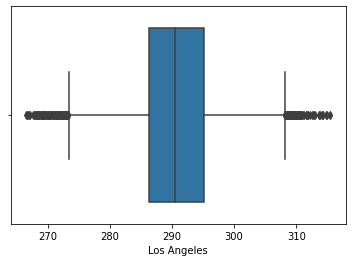

In [ ]:
temp_boxplot = sns.boxplot(x=temperature_data['Los Angeles'][1:])
temp_boxplot
plt.show()

In [ ]:
median_temp = temperature_data['Los Angeles'][1:].median()
median_temp

290.53

In [ ]:
q1_temp = temperature_data['Los Angeles'][1:].quantile(0.25)
q1_temp

286.38

In [ ]:
q3_temp = temperature_data['Los Angeles'][1:].quantile(0.75)
q3_temp

295.08

In [ ]:
min_temp = q1_temp - 1.5*(q3_temp-q1_temp)
min_temp

273.33000000000004

In [ ]:
max_temp = q3_temp + 1.5*(q3_temp-q1_temp)
max_temp

308.13

In [ ]:
temperature_nums = [None, ]
temperature_labels = [None, ]
for i in temperature_data['Los Angeles'][1:]:
  if i < q1_temp:
    temperature_labels.append("L")
    temperature_nums.append(-1)
  elif i >= q1_temp and i <= q3_temp:
    temperature_labels.append("M")
    temperature_nums.append(0)
  elif i > q3_temp:
    temperature_labels.append("H")
    temperature_nums.append(1)
  else:
    temperature_labels.append(i)
    temperature_nums.append(i)

## Combining the data

In [ ]:
la_list = {
    'Humidity': humidity_data['Los Angeles'].values,
    'Pressure': pressure_data['Los Angeles'].values,
    'Wind Speed': wind_speed_data['Los Angeles'].values,
    'Temperature': temperature_data['Los Angeles'].values,
    'label': temperature_labels
}
la_data = pd.DataFrame(la_list)

In [ ]:
la_data

,Humidity,Pressure,Wind Speed,Temperature,label
0,NaN,NaN,NaN,NaN,None
1,88.0,1013.0,0.0,291.870000,M
2,88.0,1013.0,0.0,291.868186,M
3,88.0,1013.0,0.0,291.862844,M
4,88.0,1013.0,0.0,291.857503,M
...,...,...,...,...,...
45248,24.0,1016.0,1.0,293.550000,M
45249,21.0,1016.0,1.0,295.680000,H
45250,23.0,1015.0,1.0,295.960000,H
45251,14.0,1016.0,2.0,295.650000,H


In [ ]:
la_data.dropna(inplace=True)

In [ ]:
la_data

,Humidity,Pressure,Wind Speed,Temperature,label
1,88.0,1013.0,0.0,291.870000,M
2,88.0,1013.0,0.0,291.868186,M
3,88.0,1013.0,0.0,291.862844,M
4,88.0,1013.0,0.0,291.857503,M
5,88.0,1013.0,0.0,291.852162,M
...,...,...,...,...,...
45248,24.0,1016.0,1.0,293.550000,M
45249,21.0,1016.0,1.0,295.680000,H
45250,23.0,1015.0,1.0,295.960000,H
45251,14.0,1016.0,2.0,295.650000,H


## Data Visualization

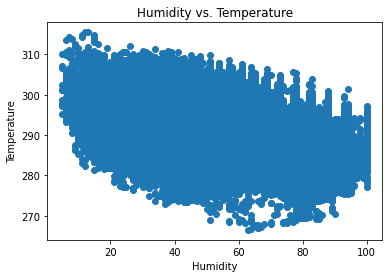

In [ ]:
plt.scatter(la_data['Humidity'], la_data['Temperature'])
plt.title('Humidity vs. Temperature')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()

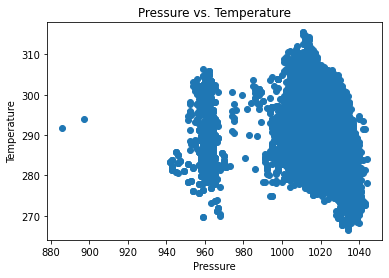

In [ ]:
plt.scatter(la_data['Pressure'], la_data['Temperature'])
plt.title('Pressure vs. Temperature')
plt.xlabel('Pressure')
plt.ylabel('Temperature')
plt.show()

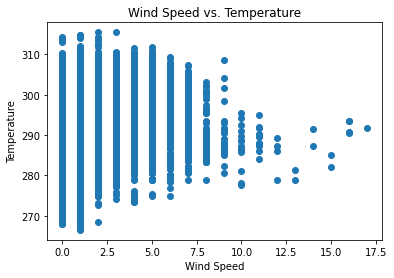

In [ ]:
plt.scatter(la_data['Wind Speed'], la_data['Temperature'])
plt.title('Wind Speed vs. Temperature')
plt.xlabel('Wind Speed')
plt.ylabel('Temperature')
plt.show()

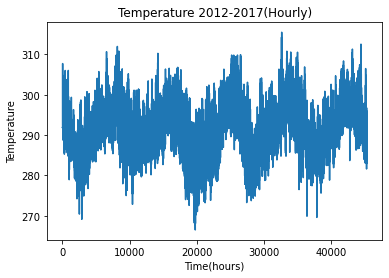

In [ ]:
plt.plot(la_data['Temperature'])
plt.title("Temperature 2012-2017(Hourly)")
plt.xlabel("Time(hours)")
plt.ylabel("Temperature")
plt.show()

## Machine Learning: Decision Tree Algorithm

In [ ]:
feature_cols = ['Humidity', 'Pressure', 'Wind Speed']
X = la_data[feature_cols]
y = la_data.label

### Train/Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1) 

In [ ]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6330847155738617


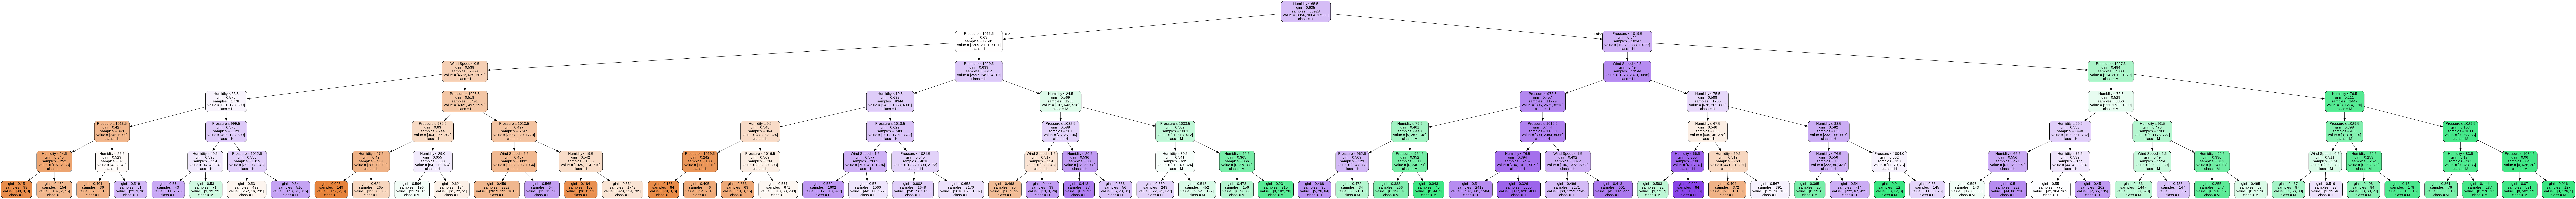

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=["L", "M", "H"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Climate Change.png')
Image(graph.create_png())

In [ ]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.6313738588287686, 0.6330847155738617)

In [ ]:
matrix = confusion_matrix(y_test, clf.predict(X_test))

In [ ]:
matrix

array([[1343,    7,  917],
       [ 118,  810, 1281],
       [ 657,  316, 3534]])

In [ ]:
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           H       0.63      0.59      0.61      8956
           L       0.71      0.37      0.49      9004
           M       0.62      0.78      0.69     17968

    accuracy                           0.63     35928
   macro avg       0.65      0.58      0.60     35928
weighted avg       0.64      0.63      0.62     35928



In [ ]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           H       0.63      0.59      0.61      2267
           L       0.71      0.37      0.48      2209
           M       0.62      0.78      0.69      4507

    accuracy                           0.63      8983
   macro avg       0.66      0.58      0.60      8983
weighted avg       0.65      0.63      0.62      8983



### Train/Validation

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=1) 

In [ ]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_val)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

Accuracy: 0.620998917581568


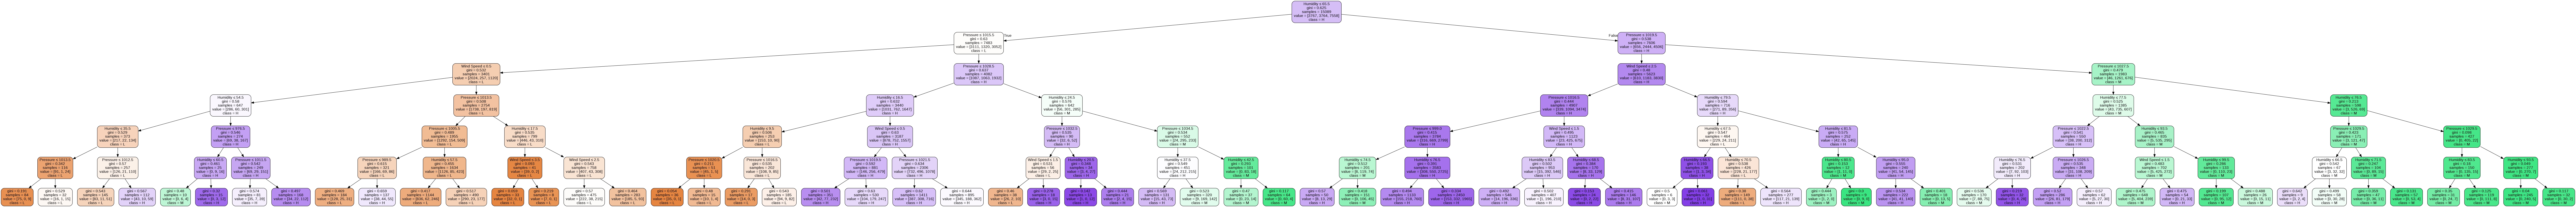

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=["L", "M", "H"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Climate Change.png')
Image(graph.create_png())

In [ ]:
clf.score(X_train, y_train), clf.score(X_val, y_val)

(0.6390748227185367, 0.620998917581568)

In [ ]:
matrix = confusion_matrix(y_val, clf.predict(X_val))

In [ ]:
matrix

array([[ 854,    7,  744],
       [  81,  645,  918],
       [ 429,  272, 2517]])

In [ ]:
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           H       0.65      0.57      0.61      3767
           L       0.70      0.40      0.51      3764
           M       0.62      0.79      0.69      7558

    accuracy                           0.64     15089
   macro avg       0.66      0.59      0.61     15089
weighted avg       0.65      0.64      0.63     15089



In [ ]:
print(classification_report(y_val, clf.predict(X_val)))

              precision    recall  f1-score   support

           H       0.63      0.53      0.58      1605
           L       0.70      0.39      0.50      1644
           M       0.60      0.78      0.68      3218

    accuracy                           0.62      6467
   macro avg       0.64      0.57      0.59      6467
weighted avg       0.63      0.62      0.61      6467



## Predictions

In [ ]:
h_mean = la_data['Humidity'].mean()

In [ ]:
p_mean = la_data['Pressure'].mean()

In [ ]:
w_mean = la_data['Wind Speed'].mean()

In [ ]:
clf.predict([[h_mean, p_mean, w_mean]])

array(['M'], dtype=object)

In [ ]:
clf.predict([[la_data['Humidity'].min(), la_data['Pressure'].min(), la_data['Wind Speed'].max()]])

array(['H'], dtype=object)

In [ ]:
la_data['Wind Speed'].mean(), la_data['Wind Speed'].min()

(1.2176081583576406, 0.0)

In [ ]:
clf.predict([[la_data['Humidity'].max(), p_mean, w_mean]])

array(['M'], dtype=object)

In [ ]:
clf.predict([[h_mean, la_data['Pressure'].max(), w_mean]])

array(['L'], dtype=object)

In [ ]:
clf.predict([[h_mean, p_mean, la_data['Wind Speed'].min()]])

array(['M'], dtype=object)